__Importing the required libraries__

In [1]:
import pandas
import numpy
from seaborn import load_dataset
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

__Loading the dataset__

In [2]:
data=load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


__Feeding the x-component only as it is unsupervised learning and hence not need the labels__

In [3]:
x = data.iloc[:,[0,1,2,3]].values

__Checking the optimum number of the Clusters that are needed to be formed__

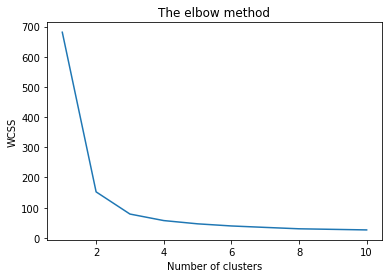

In [4]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,max_iter=300)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

__Training the model__

In [5]:
kmeans = KMeans(n_clusters=3,max_iter=300)
y_kmeans = kmeans.fit_predict(x)

__Plotting the clusters of various classes along with the centroid__

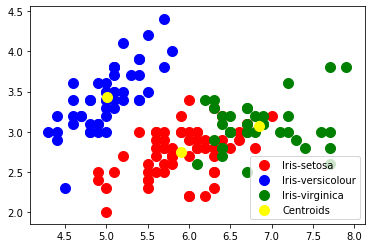

In [6]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()